# 5. A Regression Problem

In [1]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import math
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
import random


C:\Users\CHANG\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
import pandas as pd

In [4]:
from keras.callbacks import EarlyStopping

In [5]:
from keras.layers import Dropout

In [54]:
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i, end=' ')
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y, z):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)
    
    xy = z.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'g', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)
    
    print(y, ':', z)
    plt.show()
    
def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

def normal_triangle(Y):
    
    G = [(Y[0]+Y[2]+Y[4])/3.0, (Y[1]+Y[3]+Y[5])/3.0]
    
    p =[[Y[0],Y[1], math.sqrt(Y[0]**2 + Y[1]**2)],
        [Y[2],Y[3], math.sqrt(Y[2]**2 + Y[3]**2)],
        [Y[4],Y[5], math.sqrt(Y[4]**2 + Y[5]**2)]]
    
    p.sort(key=lambda x:x[2])
        
    y = np.array([p[0][0], p[0][1], p[1][0], p[1][1], p[2][0], p[2][1]])
    return y

In [31]:
#Generating data
[x_train, y_train] = generate_dataset_regression(500, 20)
[x_test, y_test] = generate_test_set_regression()

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

In [32]:
x_train.shape

(500, 5184)

In [33]:
#Transforming the data
nb_train = len(x_train)
nb_test = len(x_test)
y_train = np.zeros([nb_train, 6])
y_test = np.zeros([nb_test, 6])
for i in range(nb_train):
        y_train[i] = normal_triangle(y_train[i])
for i in range(nb_test):
        y_test[i] = normal_triangle(y_test[i])

x_train = x_train.reshape(len(x_train), 72, 72, 1)
x_test = x_test.reshape(len(x_test), 72, 72, 1)

In [34]:
print(x_train.shape)
print(x_test.shape)

(500, 72, 72, 1)
(300, 72, 72, 1)


In [42]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = x_train.shape[1]

In [43]:
model.add(Conv2D(filters=32, activation="relu", input_shape=(72, 72, 1), kernel_size=(3, 3), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Dropout(0.25))
    

In [44]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(6))

In [45]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [46]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=15, validation_data=(x_test, y_test))

Train on 500 samples, validate on 300 samples
Epoch 1/5
500/500 [==============================] - 8s 16ms/step - loss: 0.0176 - acc: 0.3980 - val_loss: 1.9052e-06 - val_acc: 0.4300
Epoch 2/5
500/500 [==============================] - 7s 13ms/step - loss: 3.2504e-06 - acc: 0.1300 - val_loss: 3.8260e-07 - val_acc: 0.1267
Epoch 3/5
500/500 [==============================] - 7s 13ms/step - loss: 1.1541e-06 - acc: 0.1860 - val_loss: 2.2535e-07 - val_acc: 0.1433
Epoch 4/5
500/500 [==============================] - 6s 12ms/step - loss: 6.6328e-07 - acc: 0.1740 - val_loss: 1.5387e-07 - val_acc: 0.1167
Epoch 5/5
500/500 [==============================] - 6s 12ms/step - loss: 3.9903e-07 - acc: 0.1680 - val_loss: 1.0962e-07 - val_acc: 0.0967


In [47]:
# test
print('\nTesting ------------')
cost = model.evaluate(x_test, y_test, batch_size=15)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)



Testing ------------
300/300 [==============================] - 1s 3ms/step
test cost: [1.0961520651164846e-07, 0.09666667096316814]
Weights= [[[[ 0.04171844 -0.0624708  -0.11477096  0.14995769 -0.00598476
     0.10385829  0.05007599  0.12513478  0.14174326 -0.07058726
     0.05725588 -0.09181923  0.0791375   0.08150901  0.13838431
    -0.04139012 -0.08176856  0.0196258  -0.08030017  0.05986013
     0.09070393  0.0942936  -0.12991725  0.10005392 -0.12983114
     0.01187397  0.00730145  0.07778689  0.09246674 -0.04740581
     0.09775922  0.01446641]]

  [[ 0.03194309  0.01742266 -0.08214637  0.07097767  0.12651943
    -0.12699187 -0.1005227   0.05728148  0.11793898  0.01277341
    -0.029888    0.0040349   0.03310075  0.02690193 -0.12517364
    -0.07511564  0.09812265  0.12625912 -0.0974031   0.04342486
     0.02787561 -0.01428394  0.06616361  0.00803917  0.00937641
    -0.01755243 -0.10945874  0.07787459  0.03991615  0.05580848
    -0.13975446  0.00862316]]

  [[-0.04528539 -0.04064532

In [48]:
model.evaluate(x_test, y_test)

300/300 [==============================] - 1s 2ms/step


[1.0961520729324548e-07, 0.09666666676600774]

In [49]:
Y_pred = model.predict(x_test, batch_size=32)

[ 5.2439654e-04 -1.9371673e-04 -7.8092166e-04 -7.3686487e-04
 -3.4888159e-04 -3.7904130e-05] : [0. 0. 0. 0. 0. 0.]


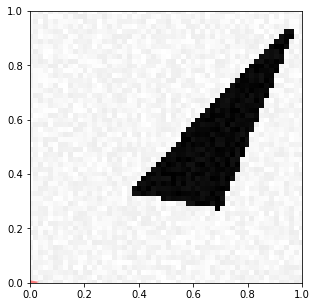

[-9.8162796e-05  6.9382600e-05 -3.5692635e-04  6.6740904e-05
 -3.1130086e-04  4.8857415e-05] : [0. 0. 0. 0. 0. 0.]


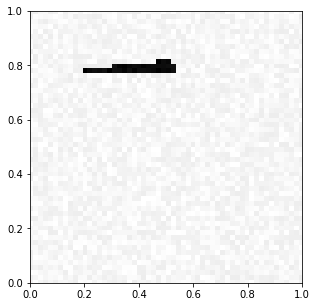

[-1.4582020e-04  1.8649723e-04  1.7340994e-04 -5.6244910e-04
  1.5695323e-04 -8.9129899e-06] : [0. 0. 0. 0. 0. 0.]


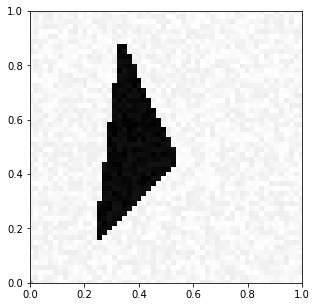

[-6.2997453e-05  2.0356220e-04 -1.5565287e-04 -3.8887607e-05
 -1.7316290e-04  4.3519540e-05] : [0. 0. 0. 0. 0. 0.]


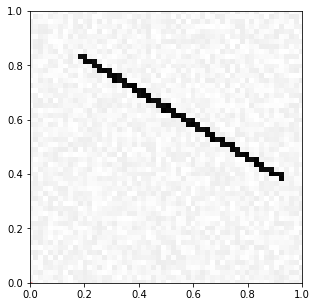

[-0.00056716  0.00033395 -0.00037305 -0.00015798  0.00029053 -0.00036257] : [0. 0. 0. 0. 0. 0.]


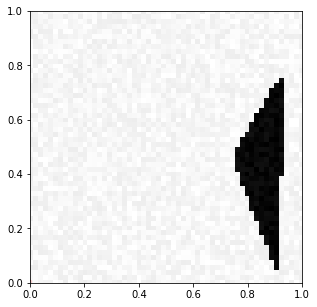

[-0.00021871 -0.00040617 -0.00042455 -0.00022837 -0.00039065 -0.00012146] : [0. 0. 0. 0. 0. 0.]


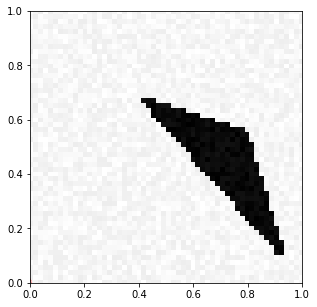

[-0.00037116 -0.00056085 -0.00010463 -0.00087823  0.0001365  -0.00037934] : [0. 0. 0. 0. 0. 0.]


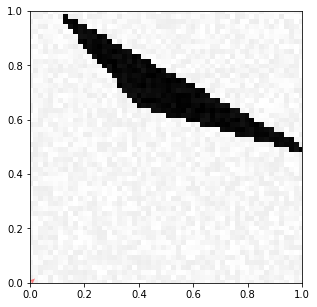

[-1.7481018e-04  1.9081472e-04 -3.0693272e-04  1.2248510e-04
 -5.4068398e-05 -8.7199034e-05] : [0. 0. 0. 0. 0. 0.]


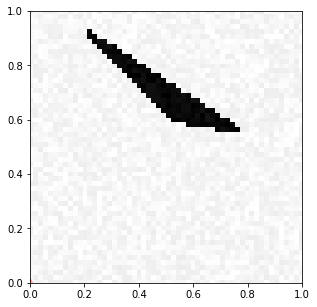

[-6.4210035e-06 -3.6156201e-04  3.5204715e-04 -4.8372766e-04
 -4.2467099e-04  1.0223081e-04] : [0. 0. 0. 0. 0. 0.]


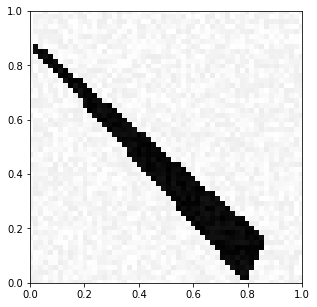

[-8.6476095e-05  4.3725595e-05 -3.9805495e-04  6.5107597e-05
 -3.1845481e-04  5.8348291e-05] : [0. 0. 0. 0. 0. 0.]


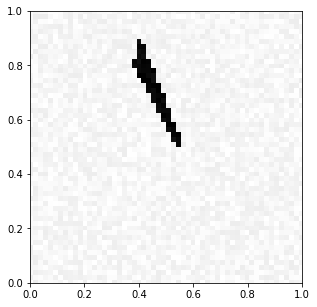

[-7.7684829e-04  5.2444753e-05 -1.2375182e-04 -8.3859055e-04
  8.6076162e-04 -5.8791670e-04] : [0. 0. 0. 0. 0. 0.]


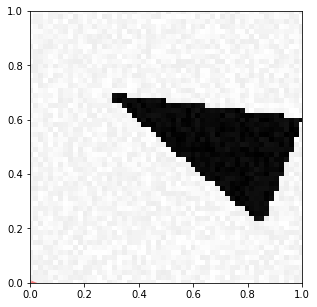

[-2.0717038e-05  1.6176666e-04  5.6264922e-05 -1.0515854e-04
 -1.8439884e-04 -3.5414705e-05] : [0. 0. 0. 0. 0. 0.]


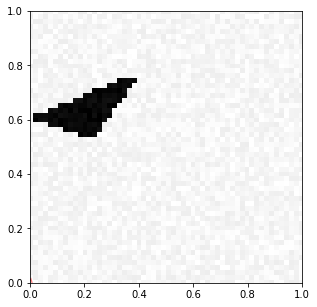

[-6.3618878e-05  7.1053742e-05 -4.2163278e-04  9.8184100e-05
 -3.0347053e-04  3.7042191e-05] : [0. 0. 0. 0. 0. 0.]


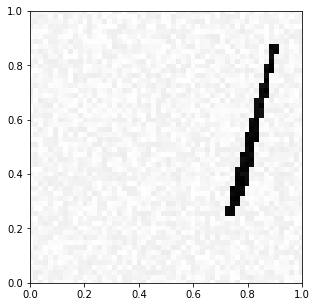

[-6.2032603e-05  4.7646347e-05 -3.6619278e-04  6.4235879e-05
 -3.4062937e-04  6.1374158e-05] : [0. 0. 0. 0. 0. 0.]


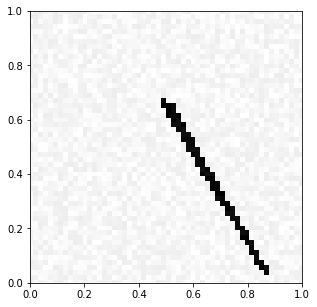

[-1.9974075e-04  2.1533389e-04 -6.3598738e-04 -8.1424019e-05
  5.4453057e-04 -1.7759437e-04] : [0. 0. 0. 0. 0. 0.]


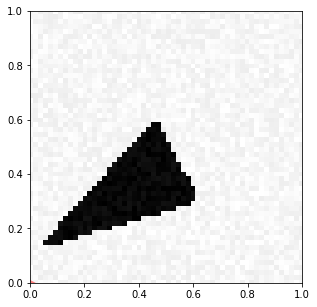

[-2.2907974e-05  3.4670695e-05 -1.5079044e-05 -8.4829284e-05
  9.9300640e-05 -1.4063227e-04] : [0. 0. 0. 0. 0. 0.]


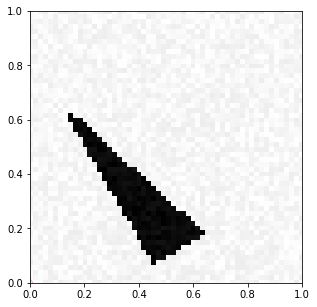

[-4.70140949e-04 -1.08792214e-04 -2.13230494e-04 -2.53189588e-04
 -3.34235374e-05 -3.56821110e-04] : [0. 0. 0. 0. 0. 0.]


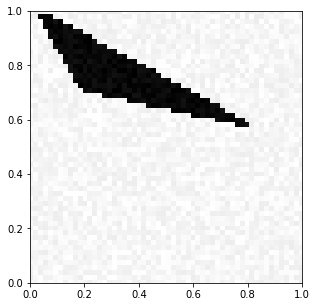

[ 3.1593163e-04 -3.4540286e-04 -1.4255242e-04  2.1894695e-05
  2.1592085e-04  3.5823951e-04] : [0. 0. 0. 0. 0. 0.]


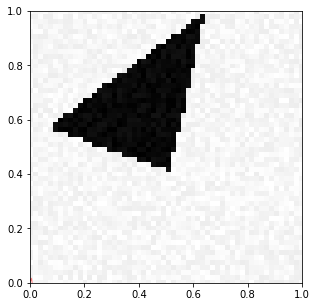

[-1.8479698e-04 -3.6420743e-04 -4.4628070e-04 -2.1111220e-05
  1.6334304e-04 -4.2982283e-04] : [0. 0. 0. 0. 0. 0.]


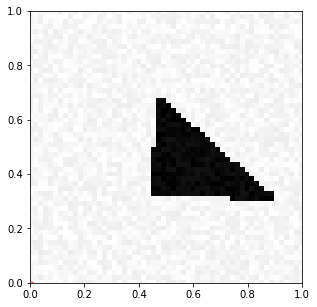

[-4.1844673e-04  1.8003141e-04  2.2633001e-05 -2.0614453e-04
  5.4578320e-04 -4.6690810e-04] : [0. 0. 0. 0. 0. 0.]


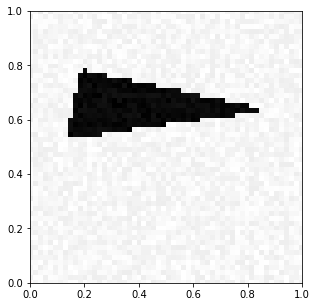

[-1.1097174e-04  1.4775340e-04 -3.1708507e-04  2.2897322e-04
 -3.1180889e-04  6.8204710e-05] : [0. 0. 0. 0. 0. 0.]


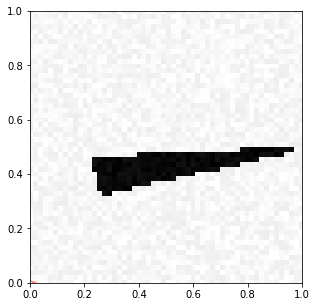

[-3.9308798e-05 -2.9891590e-04 -4.8669497e-04  2.8002576e-04
 -6.2294002e-04  4.4543995e-05] : [0. 0. 0. 0. 0. 0.]


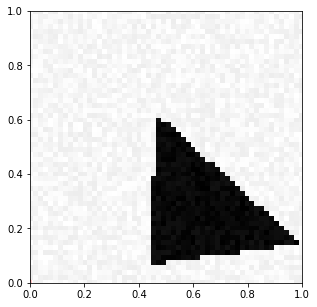

[-5.9187971e-04 -1.4580437e-04 -8.2093524e-05 -1.3220957e-03
  5.8876816e-05 -1.0299180e-03] : [0. 0. 0. 0. 0. 0.]


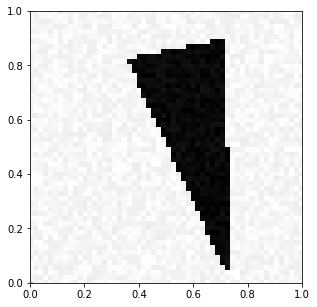

[ 2.0457199e-04  4.7249929e-04 -1.2346706e-04  1.2297765e-05
  3.3249892e-04  2.6223343e-04] : [0. 0. 0. 0. 0. 0.]


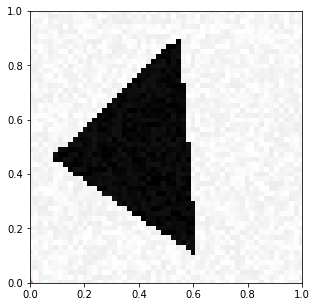

[-0.00046361 -0.00052031 -0.00052265 -0.00076677  0.0010244  -0.00010722] : [0. 0. 0. 0. 0. 0.]


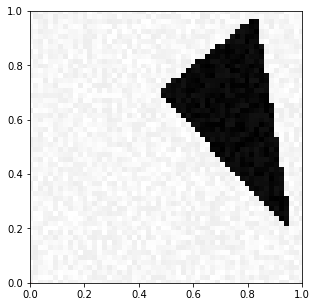

[ 3.0514877e-04 -3.0021463e-04 -4.9028592e-04  1.0647392e-04
  1.4542369e-05 -1.2077531e-04] : [0. 0. 0. 0. 0. 0.]


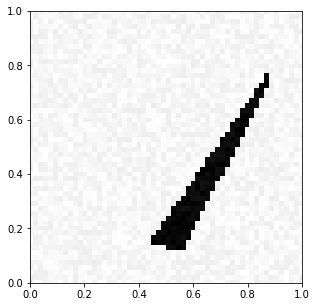

[ 5.1479321e-05 -3.8083014e-04 -2.6231632e-04 -4.2555970e-04
  1.1582044e-04 -1.1235126e-04] : [0. 0. 0. 0. 0. 0.]


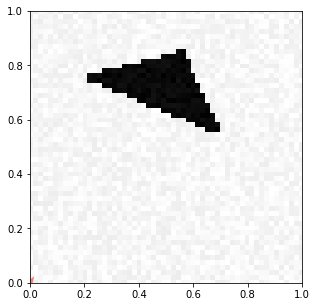

[-1.09335873e-04  1.03250146e-04 -3.57785495e-04  1.06147258e-04
 -2.49579316e-04  1.76890753e-05] : [0. 0. 0. 0. 0. 0.]


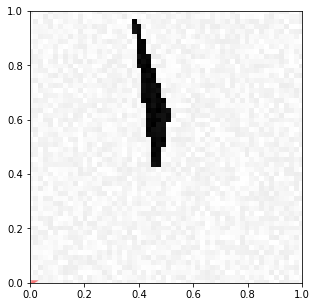

[-9.0404414e-05 -3.9864285e-04 -7.7146245e-04  1.0643748e-04
  9.2402869e-04  1.0191463e-05] : [0. 0. 0. 0. 0. 0.]


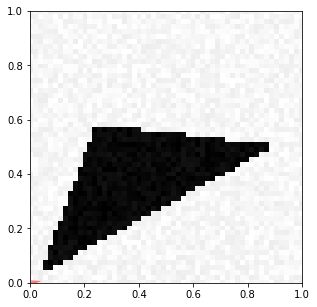

[-1.02490885e-04  2.56405096e-04 -3.72377923e-04  2.05778051e-04
 -1.04542589e-04 -3.77988908e-05] : [0. 0. 0. 0. 0. 0.]


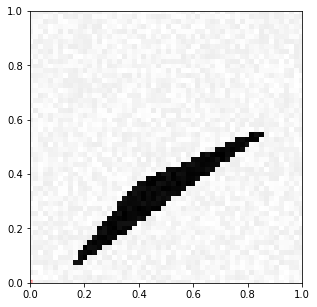

[-0.00025056 -0.00035224 -0.00029569 -0.00028024  0.00017605 -0.00020795] : [0. 0. 0. 0. 0. 0.]


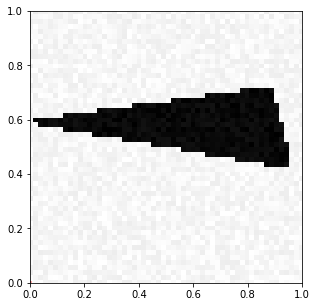

[-2.4894485e-04 -4.3590041e-04 -5.0598709e-04  3.0975090e-05
 -1.3253745e-04 -2.9371004e-04] : [0. 0. 0. 0. 0. 0.]


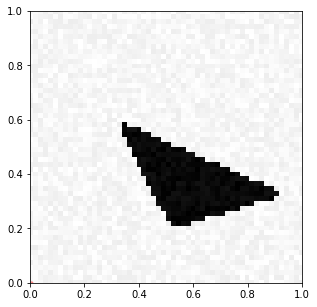

[-9.6481293e-05 -2.1344493e-04 -1.7805863e-04 -3.8986665e-04
  1.6589882e-05 -6.5154163e-05] : [0. 0. 0. 0. 0. 0.]


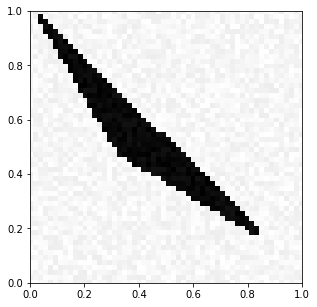

[-0.00096444 -0.0002411  -0.00122636 -0.00125288 -0.00015009 -0.00078342] : [0. 0. 0. 0. 0. 0.]


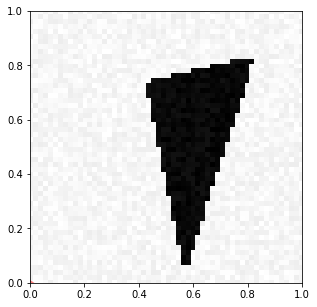

[-1.09503046e-04  7.15863425e-05 -3.68696172e-04  5.02032926e-05
 -2.74531310e-04  1.64017547e-05] : [0. 0. 0. 0. 0. 0.]


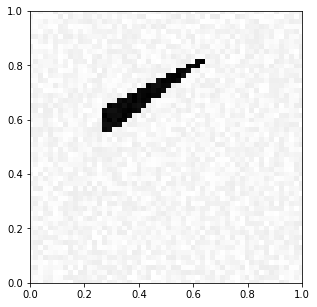

[-6.1373925e-05 -2.2682524e-04 -2.6088371e-04 -8.4100640e-05
  2.5819568e-04 -1.7564953e-04] : [0. 0. 0. 0. 0. 0.]


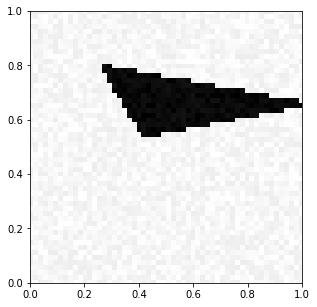

[-8.9867972e-06  1.1491147e-04 -3.6197039e-04 -1.8143916e-04
  8.8982307e-04 -1.9305968e-04] : [0. 0. 0. 0. 0. 0.]


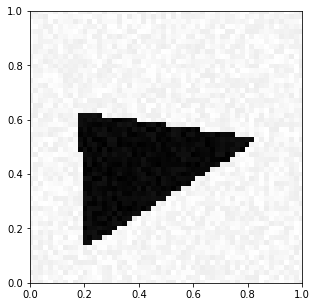

[-4.6450412e-05 -2.3091654e-04 -3.8021663e-04 -3.5326590e-04
 -3.0343188e-05 -7.8303507e-05] : [0. 0. 0. 0. 0. 0.]


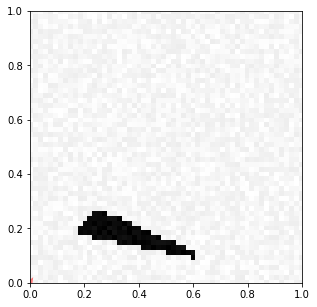

[ 0.00079719  0.00033792 -0.00061334 -0.00024708  0.00033316  0.00011167] : [0. 0. 0. 0. 0. 0.]


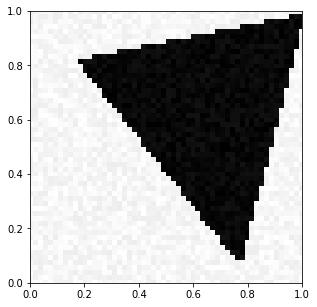

[ 6.1541796e-06  1.0852865e-04 -3.6960002e-04 -5.4760370e-05
 -1.5563937e-04  8.8899629e-05] : [0. 0. 0. 0. 0. 0.]


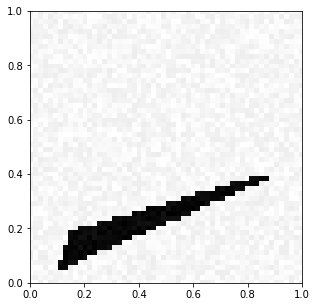

[-2.39022309e-04 -1.05794286e-04 -3.84275103e-04  3.50476475e-05
 -1.53295230e-04 -8.59557185e-05] : [0. 0. 0. 0. 0. 0.]


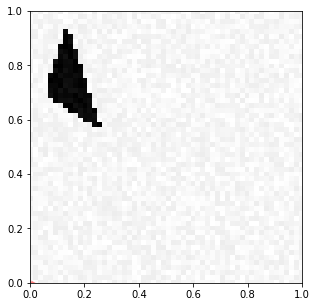

[-5.2087242e-05 -3.5510119e-04 -5.4083951e-04 -2.7247041e-04
  6.9669518e-04 -5.4701464e-05] : [0. 0. 0. 0. 0. 0.]


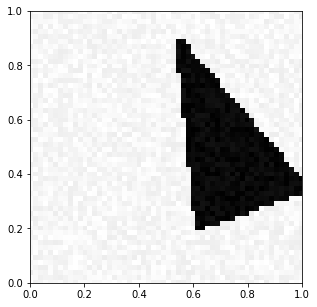

[ 1.2970064e-04 -4.0073646e-04 -3.0954368e-05 -5.3876673e-04
  6.4448919e-05 -4.6813092e-04] : [0. 0. 0. 0. 0. 0.]


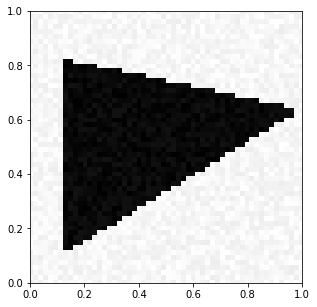

[ 2.5221659e-04  1.2349803e-05 -2.5427388e-04 -6.3761114e-04
  2.9025949e-04  2.7623144e-04] : [0. 0. 0. 0. 0. 0.]


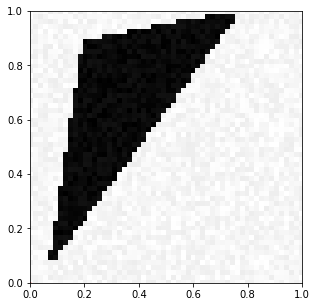

[-6.8123452e-05 -7.5143762e-06 -4.6028476e-04  6.6840905e-05
 -3.4237537e-04 -1.3677636e-05] : [0. 0. 0. 0. 0. 0.]


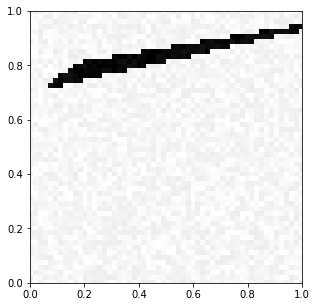

[-1.5367242e-04  5.5399723e-05 -5.4957811e-04  1.1252961e-04
 -2.3660925e-04 -5.8273785e-05] : [0. 0. 0. 0. 0. 0.]


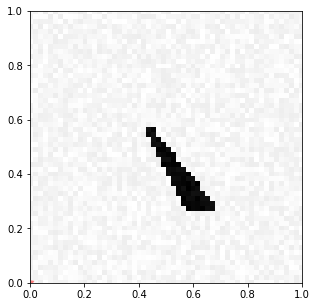

[-3.3891504e-04  2.1281571e-04 -2.8069457e-04  7.5569144e-05
 -1.1121831e-04 -9.9001685e-05] : [0. 0. 0. 0. 0. 0.]


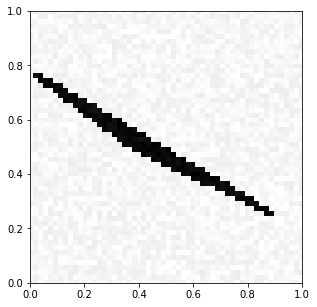

[-2.8492184e-04  1.8736580e-05 -2.1735905e-04  4.9627153e-05
  2.4154084e-05 -4.1451282e-04] : [0. 0. 0. 0. 0. 0.]


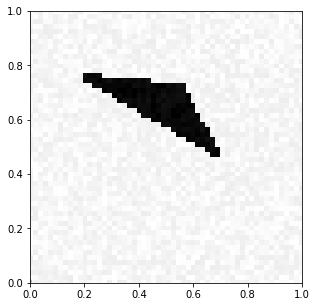

[-0.00011433 -0.00069994 -0.00060254 -0.0011239   0.00068139 -0.000451  ] : [0. 0. 0. 0. 0. 0.]


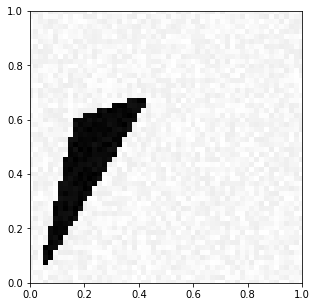

[-0.00021215  0.00012615 -0.00048416  0.00025305 -0.00011206 -0.00010004] : [0. 0. 0. 0. 0. 0.]


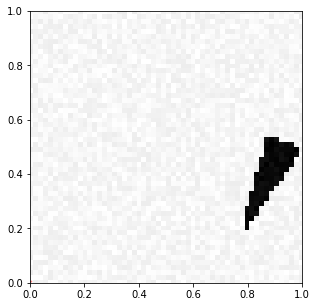

[ 5.6130346e-05  1.2308825e-04 -3.6854390e-04  1.1619460e-04
 -1.5475089e-05  7.5064600e-06] : [0. 0. 0. 0. 0. 0.]


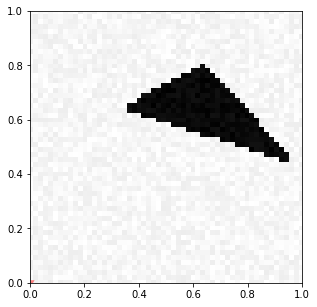

[-0.0002539  -0.00013575 -0.00056081  0.00024103 -0.00017335 -0.00014056] : [0. 0. 0. 0. 0. 0.]


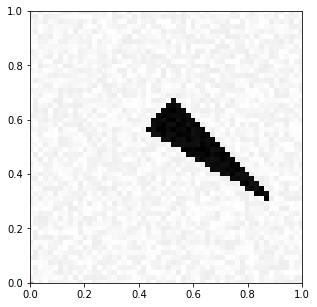

[-2.0418433e-04  3.5287184e-04 -2.8715329e-04  1.4494383e-04
 -1.8639560e-04  2.4201581e-05] : [0. 0. 0. 0. 0. 0.]


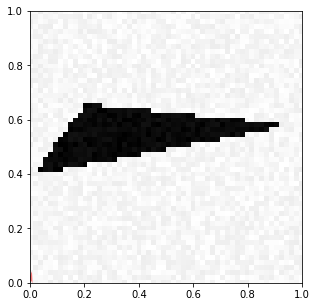

[-1.04182865e-04 -1.07517699e-04 -5.28580742e-04 -1.41670345e-04
  6.25506509e-05 -2.49936711e-05] : [0. 0. 0. 0. 0. 0.]


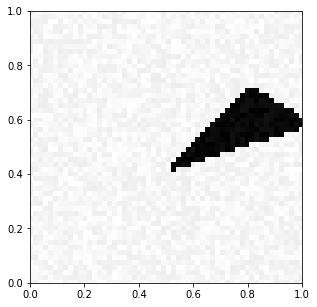

[ 1.01185404e-04  4.90008388e-05 -4.94663371e-04  2.17422610e-04
 -2.71550380e-04  2.72667035e-04] : [0. 0. 0. 0. 0. 0.]


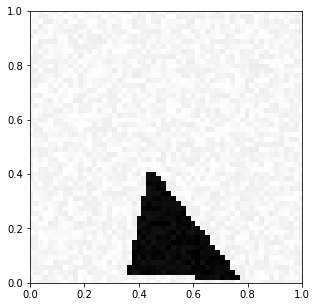

[-4.7037378e-05 -4.1819760e-04 -4.5451475e-04 -5.0665694e-05
  2.7234550e-04 -8.0792233e-05] : [0. 0. 0. 0. 0. 0.]


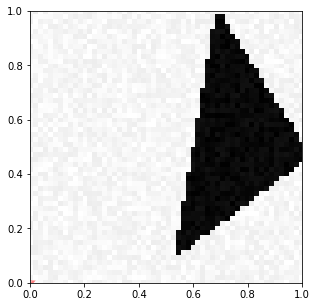

[ 1.5461119e-04 -2.0443695e-06 -5.2440842e-04 -5.8287871e-04
  1.5004864e-04  4.0256884e-05] : [0. 0. 0. 0. 0. 0.]


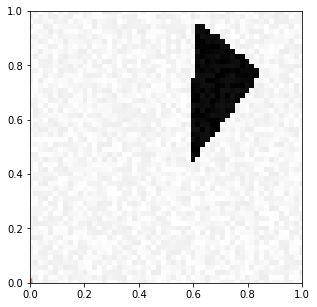

[ 2.3621658e-04 -5.2723847e-04 -1.7031329e-04 -1.2301072e-04
 -9.3065202e-05 -2.0245439e-04] : [0. 0. 0. 0. 0. 0.]


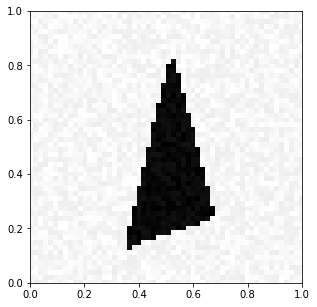

[-0.00053618 -0.00039918 -0.00041679  0.00048056 -0.00037033 -0.00044913] : [0. 0. 0. 0. 0. 0.]


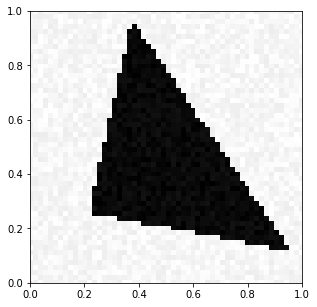

[-6.1829574e-05  8.5795997e-05 -3.5626884e-04  8.3264313e-05
 -2.9321923e-04  4.0524872e-05] : [0. 0. 0. 0. 0. 0.]


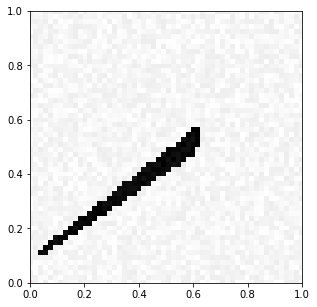

[ 7.4091135e-05  1.5732506e-04 -1.9925181e-04  2.8763595e-04
 -1.6943319e-04 -3.1761825e-05] : [0. 0. 0. 0. 0. 0.]


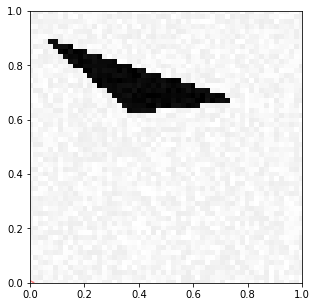

[-6.2621664e-05  5.3299358e-05 -2.3614941e-04 -8.3378982e-06
 -3.4535886e-04 -4.2244093e-05] : [0. 0. 0. 0. 0. 0.]


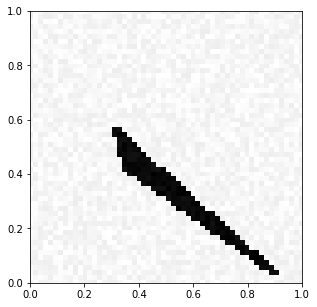

[-7.2538620e-05  4.5826542e-05 -4.1378546e-04  6.6080247e-05
 -2.7448079e-04  2.5819289e-05] : [0. 0. 0. 0. 0. 0.]


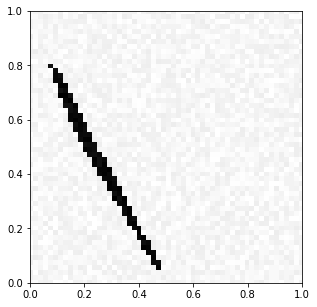

[-2.1306169e-04 -2.2188528e-05 -5.1446725e-04  9.5163588e-05
  1.6004569e-04 -2.5899173e-04] : [0. 0. 0. 0. 0. 0.]


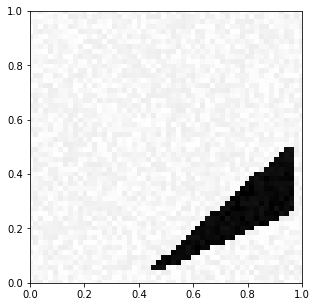

[ 5.6080054e-05 -1.3947720e-05 -4.1360012e-04  1.1866342e-04
 -4.5073777e-04  4.7621783e-05] : [0. 0. 0. 0. 0. 0.]


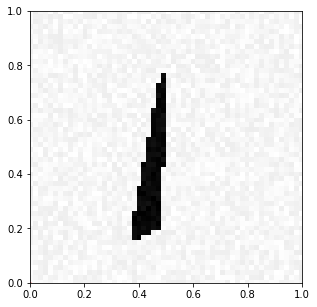

[ 0.00015483  0.00047717 -0.00027322  0.00036406 -0.00042332  0.00026934] : [0. 0. 0. 0. 0. 0.]


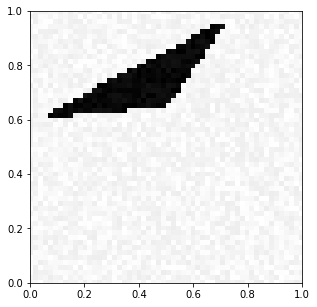

[ 8.1227627e-06  1.2942078e-04 -2.9621739e-04  4.8749032e-05
 -1.9426527e-04  7.4344222e-05] : [0. 0. 0. 0. 0. 0.]


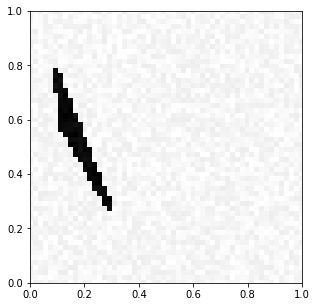

[-0.00021512 -0.00012242 -0.00091542 -0.00051901  0.00080373 -0.00060658] : [0. 0. 0. 0. 0. 0.]


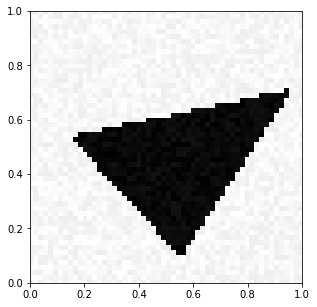

[-1.8801074e-05  2.6197790e-04 -4.7210045e-04  3.5006308e-04
 -2.1912321e-04  2.3576664e-05] : [0. 0. 0. 0. 0. 0.]


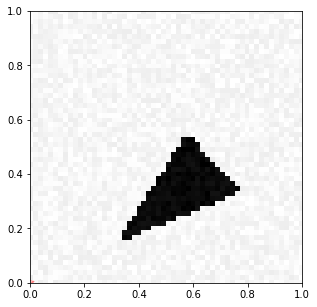

[-1.3453164e-04 -2.7115224e-05 -3.0321488e-04 -1.8532015e-04
  3.0485471e-04 -3.3104909e-04] : [0. 0. 0. 0. 0. 0.]


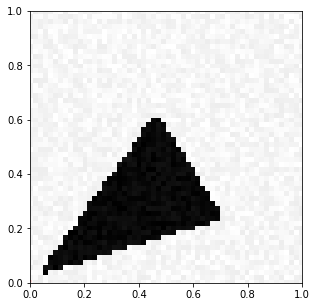

[-2.9625371e-06  7.0669921e-05 -3.1063799e-04  8.5747219e-05
 -3.3009890e-04  1.2427568e-04] : [0. 0. 0. 0. 0. 0.]


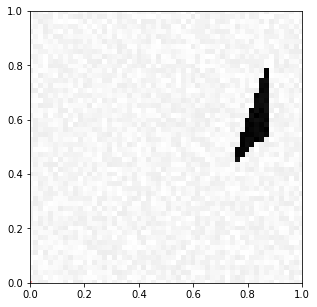

[ 2.4209428e-04  1.8693483e-04  3.2360014e-04 -7.2756375e-04
 -9.0399291e-05 -4.1060848e-05] : [0. 0. 0. 0. 0. 0.]


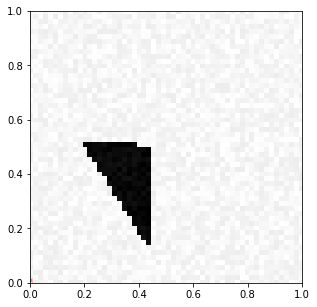

[-2.7170405e-04 -1.3509765e-04 -3.2676384e-04  8.1643579e-05
  1.3753562e-04 -3.4867669e-04] : [0. 0. 0. 0. 0. 0.]


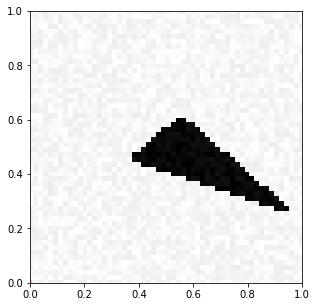

[-7.1630813e-05  7.8542391e-05 -4.0206057e-04  8.3646621e-05
 -2.7436437e-04  4.9011316e-05] : [0. 0. 0. 0. 0. 0.]


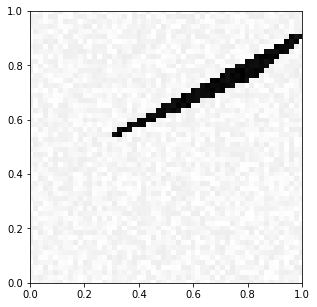

[-4.79421578e-05  9.75071453e-05 -4.04290389e-04  1.20162265e-04
 -3.01487744e-04  6.27653208e-05] : [0. 0. 0. 0. 0. 0.]


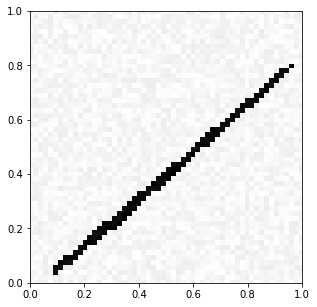

[-0.00062755 -0.00064372 -0.00042297 -0.00047289 -0.00058893 -0.0005876 ] : [0. 0. 0. 0. 0. 0.]


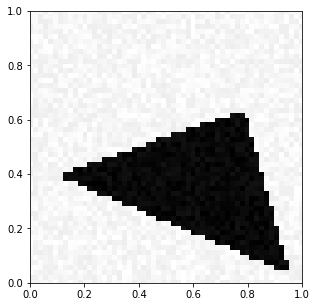

[-3.4719333e-04 -6.8823574e-05 -1.4122203e-04 -2.4493854e-04
  1.2501329e-04 -2.4040719e-04] : [0. 0. 0. 0. 0. 0.]


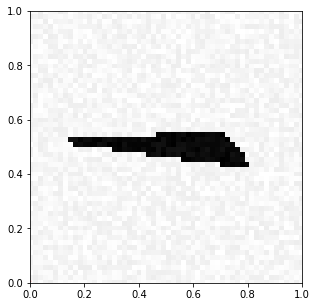

[-8.1976876e-05  9.0049929e-05 -3.9179530e-04  1.0308006e-04
 -2.7497462e-04  3.3956021e-05] : [0. 0. 0. 0. 0. 0.]


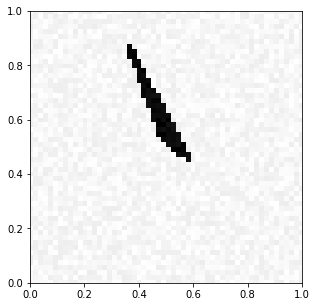

[-8.43913294e-05 -1.21172285e-04 -4.12689988e-04  1.27458829e-04
  1.69542618e-05 -2.50451267e-04] : [0. 0. 0. 0. 0. 0.]


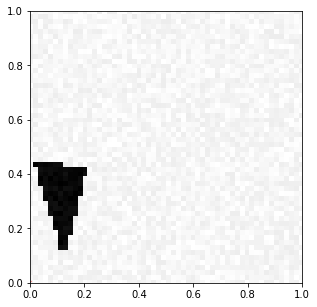

[-5.4488424e-05 -1.5941169e-04 -1.4528912e-04 -6.6523592e-04
  5.8751949e-04 -3.8952171e-04] : [0. 0. 0. 0. 0. 0.]


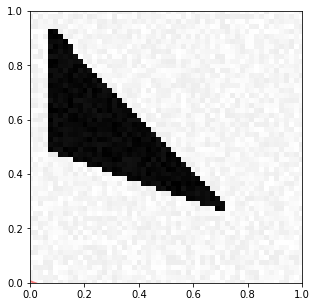

[-1.2679747e-04 -1.1750264e-04  8.0857892e-05 -3.5035948e-04
  5.0582434e-04 -2.1603471e-04] : [0. 0. 0. 0. 0. 0.]


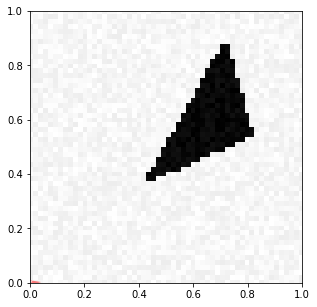

[-8.2408311e-05  3.4420984e-05 -3.0060206e-04  6.3823699e-04
 -7.7234395e-04  1.4902744e-04] : [0. 0. 0. 0. 0. 0.]


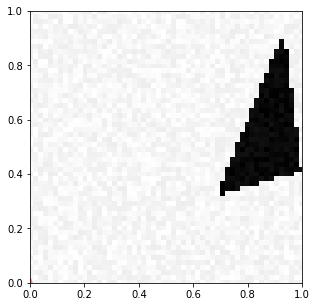

[-8.49715434e-05  7.44925346e-05 -3.82445287e-04  1.11678615e-04
 -3.38129466e-04  4.33211681e-05] : [0. 0. 0. 0. 0. 0.]


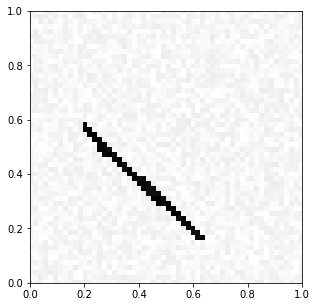

[ 1.6161706e-05  1.3296586e-04 -4.2538391e-04  1.1906354e-04
 -1.9166688e-04  2.4505192e-05] : [0. 0. 0. 0. 0. 0.]


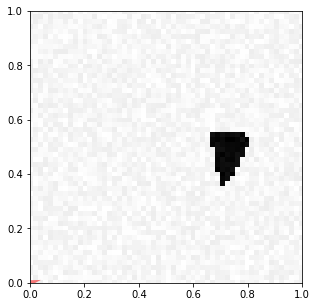

[-6.6929031e-05  9.1595226e-05  7.2724978e-04 -2.1086447e-04
 -1.6277540e-04 -2.3549260e-04] : [0. 0. 0. 0. 0. 0.]


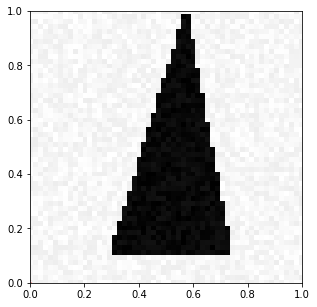

[ 0.00045287 -0.00041088 -0.00040888 -0.00053104 -0.0001793   0.00032385] : [0. 0. 0. 0. 0. 0.]


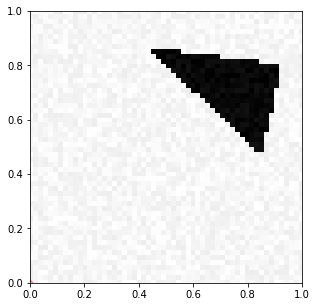

[-2.9506721e-04 -1.7872080e-06 -2.9866211e-04 -7.2105671e-05
 -3.0314107e-04 -1.0943622e-04] : [0. 0. 0. 0. 0. 0.]


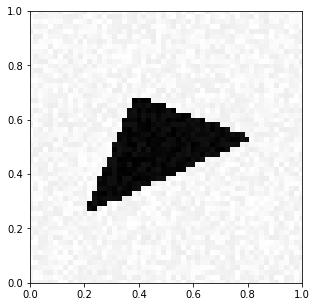

[ 8.3446503e-07  1.5183003e-04 -3.5079382e-04  2.2969011e-04
 -6.6769542e-05 -1.6308855e-05] : [0. 0. 0. 0. 0. 0.]


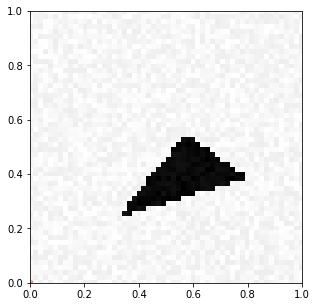

[ 5.7005719e-04  2.0161178e-04  4.0438958e-05 -1.8277246e-04
 -2.3650820e-04  3.1656283e-04] : [0. 0. 0. 0. 0. 0.]


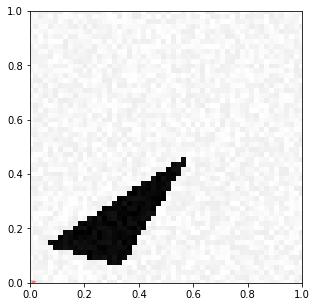

[ 4.0662196e-04 -1.0032889e-03 -5.9796288e-04 -3.8812635e-04
 -1.6798428e-04  9.6160686e-05] : [0. 0. 0. 0. 0. 0.]


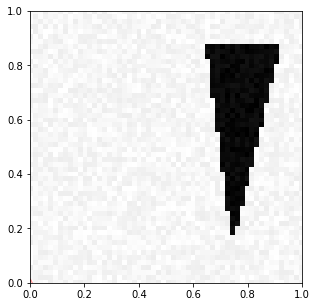

[-0.00061151  0.00079774 -0.00084173  0.00011331  0.00068038 -0.00035193] : [0. 0. 0. 0. 0. 0.]


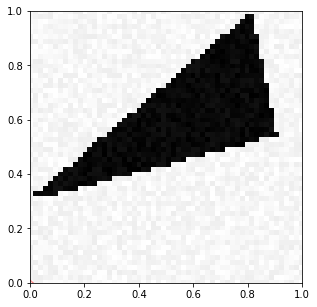

[-6.8377703e-05 -1.5403959e-04 -3.4931093e-04  1.8803228e-04
 -3.4041819e-04 -7.7912351e-05] : [0. 0. 0. 0. 0. 0.]


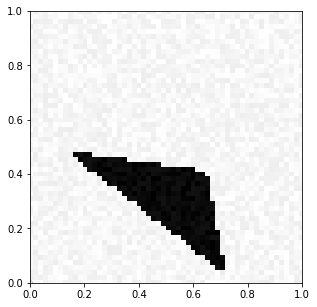

[ 0.00038185 -0.00018007  0.00056292 -0.00033979 -0.00011873  0.00014136] : [0. 0. 0. 0. 0. 0.]


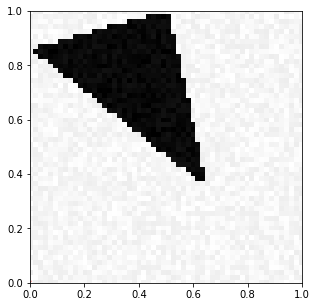

[-6.9732778e-07 -2.9372168e-04 -6.4678560e-04  5.3003058e-04
 -4.4187042e-04  2.1121767e-04] : [0. 0. 0. 0. 0. 0.]


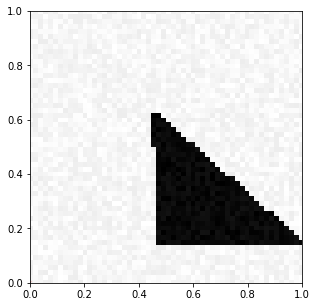

[-4.7136843e-04 -3.2542390e-04 -4.6714675e-05 -9.6398441e-04
  4.6815560e-04 -3.8703787e-04] : [0. 0. 0. 0. 0. 0.]


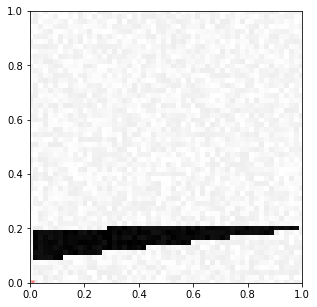

[-1.3396144e-04 -4.5735389e-05 -6.8487483e-04  2.2326282e-04
  3.7822640e-04 -1.1959276e-04] : [0. 0. 0. 0. 0. 0.]


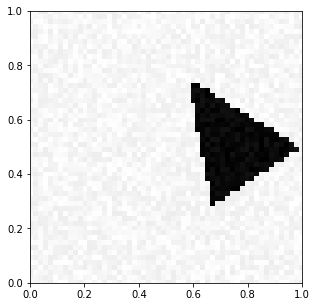

[-3.9695716e-04 -5.3553958e-04 -6.7930808e-04  9.1356924e-05
  3.8981833e-04 -4.5554969e-04] : [0. 0. 0. 0. 0. 0.]


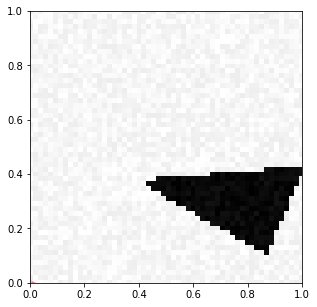

[ 9.1285678e-05 -1.2760237e-04 -2.9056612e-04 -2.8064183e-04
 -1.2290152e-04 -6.8367692e-05] : [0. 0. 0. 0. 0. 0.]


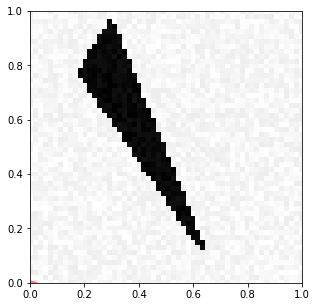

[ 9.2036789e-05 -2.6554684e-04 -9.8558841e-05 -8.8408124e-06
 -2.6061595e-04 -2.3882138e-04] : [0. 0. 0. 0. 0. 0.]


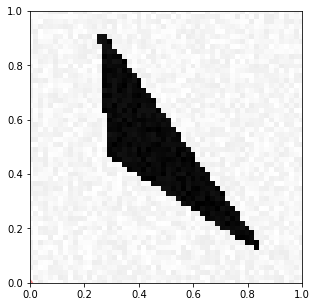

[-5.3003943e-04  1.9992003e-04  5.5319117e-04 -8.4096903e-04
  2.1059066e-05 -5.9494819e-04] : [0. 0. 0. 0. 0. 0.]


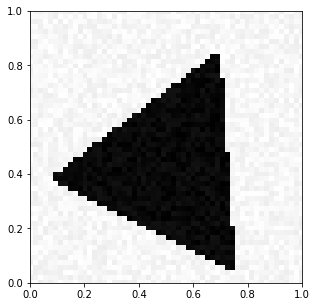

In [57]:
for i in range(100):
        visualize_prediction(x_test[i], Y_pred[i], y_test[i])

[ 5.4371543e-05 -1.5916475e-03  1.9202242e-04 -8.5140171e-04
  6.5496215e-04 -1.2215576e-04] : [0. 0. 0. 0. 0. 0.]


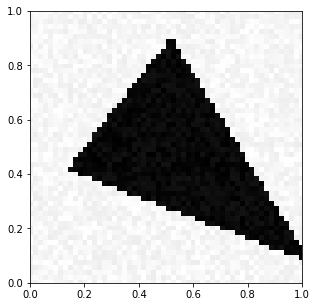

[ 1.0168785e-04  4.0615024e-04 -3.9208354e-04  5.6458462e-05
  1.6811420e-04  1.5157973e-05] : [0. 0. 0. 0. 0. 0.]


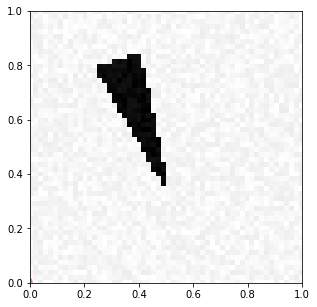

[-7.7953562e-05  4.4819317e-05 -4.0509016e-04  5.8455975e-05
 -2.8995401e-04  3.9670151e-05] : [0. 0. 0. 0. 0. 0.]


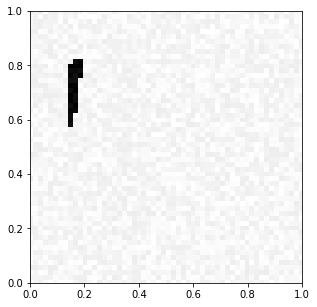

[-0.00046361 -0.00052031 -0.00052265 -0.00076677  0.0010244  -0.00010722] : [0. 0. 0. 0. 0. 0.]


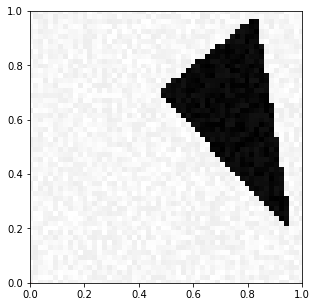

[-0.00021512 -0.00012242 -0.00091542 -0.00051901  0.00080373 -0.00060658] : [0. 0. 0. 0. 0. 0.]


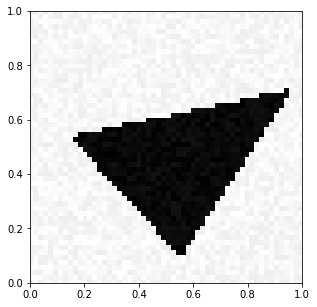

[-2.8477516e-05  1.3167656e-04 -3.7958473e-04  3.6774029e-04
  2.1613715e-04 -1.6934471e-04] : [0. 0. 0. 0. 0. 0.]


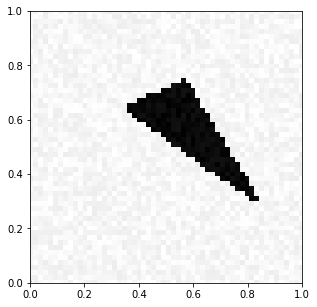

[ 3.0267518e-05 -3.7224381e-04 -2.3423973e-04 -9.2015578e-04
  7.0839352e-04 -3.2617687e-04] : [0. 0. 0. 0. 0. 0.]


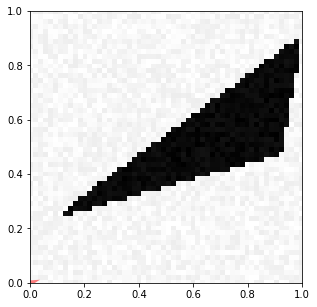

[-2.8138515e-05  1.3072696e-04 -2.6524835e-04  3.3203163e-05
 -3.9054127e-04  6.8552559e-05] : [0. 0. 0. 0. 0. 0.]


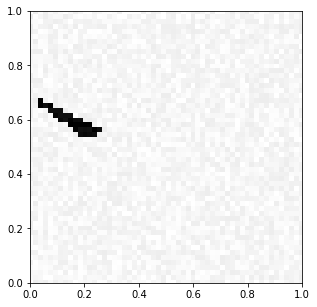

[-0.00011788 -0.00066829 -0.00101468 -0.00101969  0.00060413 -0.00035579] : [0. 0. 0. 0. 0. 0.]


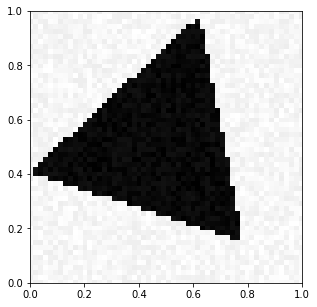

[ 4.0657260e-04 -1.6633910e-04  2.7172989e-04 -2.2071961e-04
 -3.4479029e-04  5.8199978e-05] : [0. 0. 0. 0. 0. 0.]


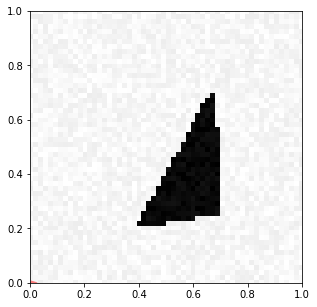

[-3.8095331e-04  6.3052867e-05 -4.6272622e-04  8.6327316e-05
 -3.0191150e-06 -1.0308297e-04] : [0. 0. 0. 0. 0. 0.]


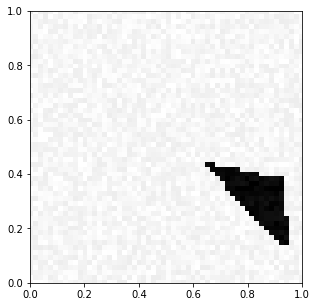

[-0.00011433 -0.00069994 -0.00060254 -0.0011239   0.00068139 -0.000451  ] : [0. 0. 0. 0. 0. 0.]


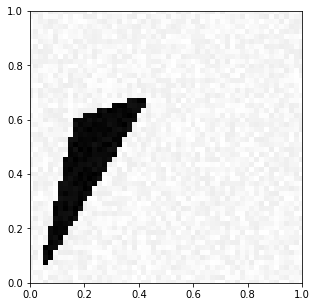

[ 0.00018507  0.00013904 -0.00016225 -0.00017474 -0.00033086  0.00042944] : [0. 0. 0. 0. 0. 0.]


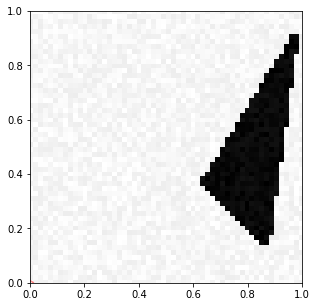

[-2.1306169e-04 -2.2188528e-05 -5.1446725e-04  9.5163588e-05
  1.6004569e-04 -2.5899173e-04] : [0. 0. 0. 0. 0. 0.]


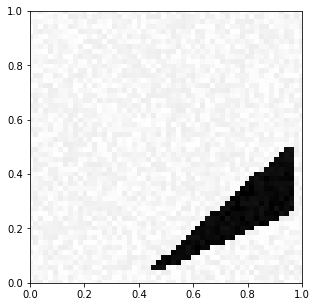

[-0.00062755 -0.00064372 -0.00042297 -0.00047289 -0.00058893 -0.0005876 ] : [0. 0. 0. 0. 0. 0.]


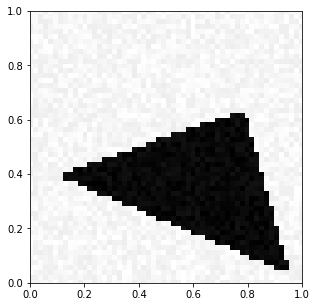

[ 0.00027364 -0.00080603 -0.0002364  -0.00026022  0.00072825 -0.0001796 ] : [0. 0. 0. 0. 0. 0.]


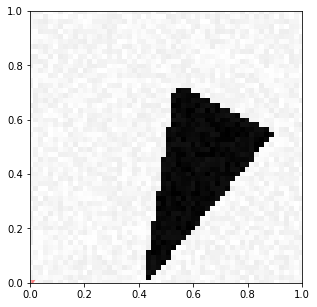

[ 6.45681284e-05  1.96513953e-04 -2.90546333e-04  1.01450365e-04
 -2.52148369e-04 -3.04254005e-04] : [0. 0. 0. 0. 0. 0.]


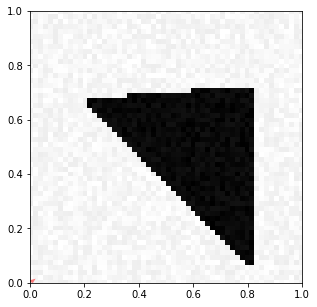

[-2.9506721e-04 -1.7872080e-06 -2.9866211e-04 -7.2105671e-05
 -3.0314107e-04 -1.0943622e-04] : [0. 0. 0. 0. 0. 0.]


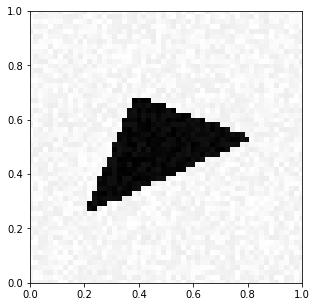

[ 3.0673109e-05  3.3520395e-05 -4.6307920e-04  8.8598812e-05
 -2.0793919e-04  3.0563213e-05] : [0. 0. 0. 0. 0. 0.]


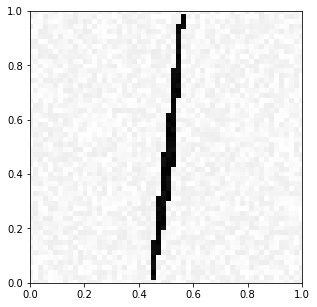

[ 6.99912198e-06 -1.73028093e-05 -4.04694118e-04  7.02262623e-05
 -1.02356775e-04  2.55310442e-05] : [0. 0. 0. 0. 0. 0.]


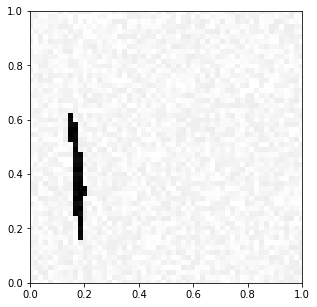

[-2.2907974e-05  3.4670695e-05 -1.5079044e-05 -8.4829284e-05
  9.9300640e-05 -1.4063227e-04] : [0. 0. 0. 0. 0. 0.]


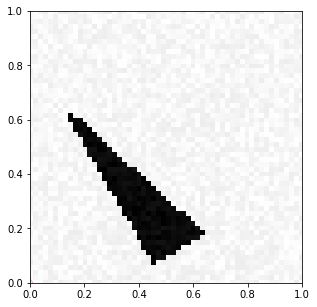

[-0.00011788 -0.00066829 -0.00101468 -0.00101969  0.00060413 -0.00035579] : [0. 0. 0. 0. 0. 0.]


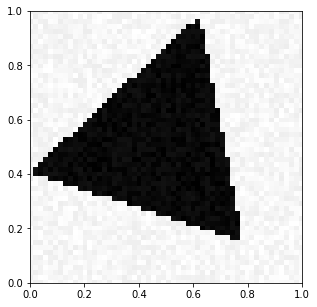

[-1.5362864e-04  1.6323058e-05 -8.4266998e-05 -1.2123678e-04
  1.5807943e-04 -1.3907556e-04] : [0. 0. 0. 0. 0. 0.]


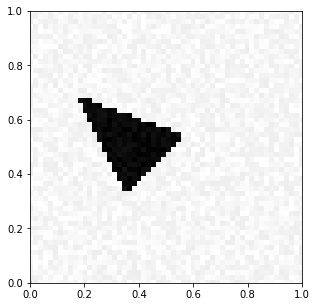

[-7.5458549e-05 -1.6477495e-04  3.8301107e-05 -2.7496403e-04
 -8.7152235e-05 -1.8527755e-04] : [0. 0. 0. 0. 0. 0.]


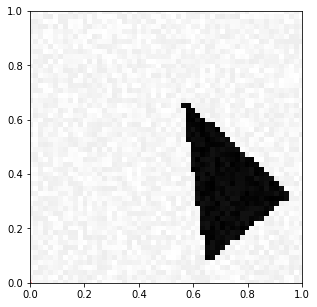

In [59]:
for i in range(24):
    j = random.randint(0, 300)
    visualize_prediction(x_test[j], Y_pred[j], y_test[j])